![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrando funções menos regulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def midpoint(f, a, b, n=1000):
    if a == b:
        return 0
    h = (b-a)/n
    pts= np.linspace(a + h/2, b - h/2, num=n, endpoint=True)
    integral = 0
    for pt in pts:
        integral += f(pt)*h

    return integral

def trap(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    integral = 0
    for i in range(1, len(pts)):
        integral += f(pts[i])*h
    integral += ((f(a)+f(b))*h)/2
    return integral

def simpson(f, a, b, n=1000):
    return (2*(midpoint(f, a, b, n) + trap(f, a, b, n)/2))/3

In [3]:
def f(x):
    return np.abs(np.sin(x))

## Questão 1: Primitiva

Dê uma primitiva analítica de $f$.

Dica: use a função `np.divmod` (versão vetorizada da `divmod` do python).

In [4]:
def F(x):
    divm = np.divmod(x, np.pi) 
    return divm[0] * 2 + -np.cos(divm[1]) + 1

In [5]:
assert np.isclose(F(10+0.1), F(10) + 0.1 * f(10), atol=1e-2)

In [6]:
assert np.isclose(F(2+0.01), F(2) + 0.01 * f(2), atol=1e-4)

Explique as tolerâncias dos testes acima.

O primeiro assert compara o resultado da integral de 0 até 10.1, com a integral de 0 até 10 adicionado de um retângulo de base 0.1 e altura f(10). Já o segundo assert compara o resultado da integral de 0 até 2.01, com a integral de 0 até 2 adicionado de um retângulo de base 0.01 e altura f(2). O método do retângulo possui um erro da ordem de $h^2$ para cada retângulo, sendo h a largura deste retângulo. Por isso é esperado que o segundo argumento dos asserts apresente um erro quando comparado ao primeiro argumento, da ordem do passo ao quadrado. No primeiro assert, $h=0.1$ e $atol = (0.1)^2$; e no, segundo assert,  $h=0.01$ e $atol = (0.01)^2$.

In [7]:
ts = np.linspace(0,10, num=200)
Fts = F(ts)
assert np.all(Fts[1:] > Fts[:-1])

## Questão 2: Erros

Faça um gráfico dos erros de integração de $f$
pelos métodos do ponto médio e Simpson, no intervalo $[0,3]$

Text(0.5, 1.0, 'Erro Simpson vs Ponto médio')

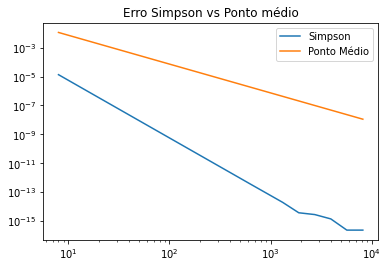

In [8]:
a, b = 0, 3
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
err_simpsons = [abs(exact - simpson(f, a, b, n)) for n in ns]
err_medios = [abs(exact - midpoint(f, a, b, n)) for n in ns]
plt.loglog(ns, err_simpsons, label="Simpson")
plt.loglog(ns, err_medios, label="Ponto Médio")
plt.legend()
ax = plt.gca()
ax.set_title("Erro Simpson vs Ponto médio")

In [9]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [10]:
ax = None

O que você observa neste gráfico?

O Erro do método de simpson é bem menor que o erro do método do midpoint e descresce mais rápido conforme o número de subdivisões no intervalo aumenta.

Agora, repita o gráfico para o intervalo $[0,6]$:

Text(0.5, 1.0, 'Erro Simpson vs Ponto médio')

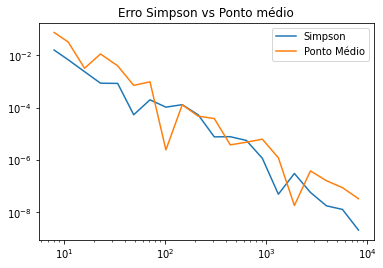

In [11]:
a, b = 0, 6
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
err_simpsons = [abs(exact - simpson(f, a, b, n)) for n in ns]
err_medios = [abs(exact - midpoint(f, a, b, n)) for n in ns]
plt.loglog(ns, err_simpsons, label="Simpson")
plt.loglog(ns, err_medios, label="Ponto Médio")
plt.legend()
ax = plt.gca()
ax.set_title("Erro Simpson vs Ponto médio")

In [12]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [13]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [14]:
ax = None

Como esse gráfico é diferente do outro?

No primeiro gráfico, os erros são praticamente lineares na escala log log. No segundo gráfico, não vemos esse comportamento linear, pois os erros oscilam bastante. 

## Questão 3: Encontrando o intervalo contendo $\pi$

Como $|\sin(x)|$ não é derivável em $\pi$, vamos ver quanto erro tem no sub-intervalo que "atravessa" $\pi$.

Escreva a função `I_x(a, b, x, n)` que retorna o intervalo contendo $x$ ao dividir $[a,b]$ em $n$ partes.
Você pode assumir que x nunca vai ser uma das extremidades $a_k$.

In [67]:
def I_x(a, b, x, n):
    """The interval  [xi, xi+h]  containing  x, when  [a,b]  is divided in  n  equal parts.
    Returns  None  if  x  is outside  [a,b]"""
    if (x-a)*(x-b) > 0:
        return
    pts = np.linspace(a, b, num=n+1, endpoint=True)
    for i in range(len(pts)-1):
        if pts[i] < x and x < pts[i+1]:
            return [pts[i], pts[i+1]]

In [58]:
l, r = I_x(0, 6, np.pi, 10)
assert np.isclose(l, 3)
assert np.isclose(r, 3.6)

In [59]:
l, r = I_x(0, 60, np.pi, 10)
assert l <= np.pi <= r

In [60]:
l, r = I_x(0, 1, 0.4, 36)
assert l < 0.4 < r

Agora, faça o gráfico do erro que os métodos do ponto médio e de Simpson
vão dar quando integrarem o intervalo contendo a "descontinuidade" $\pi$,
em função de $n$.

Text(0.5, 1.0, 'Erro Simpson vs Ponto médio no subintervalo')

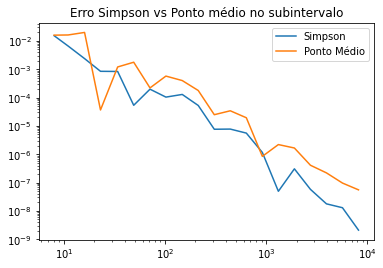

In [74]:
a, b = 0, 6
ns = np.logspace(3,13, num=20, dtype=int, base=2)
err_simpsons = []
err_medios  = []
for n in ns:
    new_a, new_b = I_x(a, b, np.pi, n)
    exact = F(new_b) - F(new_a)
    err_simpsons.append(abs(exact - simpson(f, new_a, new_b, 1)))
    err_medios.append(abs(exact - midpoint(f, new_a, new_b, 1)))

plt.loglog(ns, err_simpsons, label="Simpson")
plt.loglog(ns, err_medios, label="Ponto Médio")
plt.legend()
ax = plt.gca()
ax.set_title("Erro Simpson vs Ponto médio no subintervalo")

In [71]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [72]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [73]:
ax = None

## Questão 4: Um intervalo contra todos

Vamos ver quanto do erro de cada método é causado pelo erro em apenas um intervalo.

Faça um gráfico para comparar esses erros:
- à esquerda, os erros para o ponto médio
- à direita, os erros para o método de Simpson

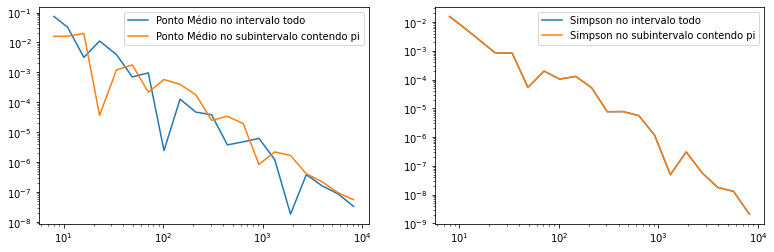

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))


a, b = 0, 6
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)
err_simpsons = [abs(exact - simpson(f, a, b, n)) for n in ns]
err_medios = [abs(exact - midpoint(f, a, b, n)) for n in ns]

err_simpsons_sub = []
err_medios_sub  = []
for n in ns:
    new_a, new_b = I_x(a, b, np.pi, n)
    exact = F(new_b) - F(new_a)
    err_simpsons_sub.append(abs(exact - simpson(f, new_a, new_b, 1)))
    err_medios_sub.append(abs(exact - midpoint(f, new_a, new_b, 1)))



ax1.loglog(ns, err_medios, label="Ponto Médio no intervalo todo")
ax1.loglog(ns, err_medios_sub, label="Ponto Médio no subintervalo contendo pi")
ax1.legend()

ax2.loglog(ns, err_simpsons, label="Simpson no intervalo todo")
ax2.loglog(ns, err_simpsons_sub, label="Simpson no subintervalo contendo pi")
ax2.legend()



ax = plt.gca()


In [79]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2

In [80]:
assert len(ax2.lines) == 2
assert len(ax2.legend().texts) == 2

In [81]:
for l in ax1.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7
for l in ax2.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

In [82]:
ax = None

O que você observa quanto aos erros dos métodos?

No método de simpson, o erro do subintervalo contendo a descontinuidade corresponde a praticamente todo o erro do intervalo total, já que os gráficos estão colados. Já no método do ponto médio, o erro do subintervalo é menor que o erro do intervalo total em alguns pontos, em outros pontos e, aparentemente, na maior parte deles chega a ser maior ou igual ao erro do intervalo total. Isso pode estar acontecendo porque existem erros se "anulando", devido a diferença de sinal, no cálculo do erro do intervalo total, que é feito somando os erros de cada subintervalo. 

## Questão 5: Integração com ajuda humana

Mude a integral de $[0,6]$ por duas integrais, uma em $[0,\pi]$ e outra em $[\pi,6]$.
Faça dois gráficos comparando os erros dos 4 métodos:
- Um para o método do ponto médio, o outro para o método de Simpson
- Em cada um, o erro cometido por uma única integral e o erro cometido pela integral feita em 2 partes

Use o mesmo número $n$ **total** de sub-intervalos, para não "roubar" em favor do que quebra a integral em 2  :-)

In [94]:
np.floor(2.5)

2.0

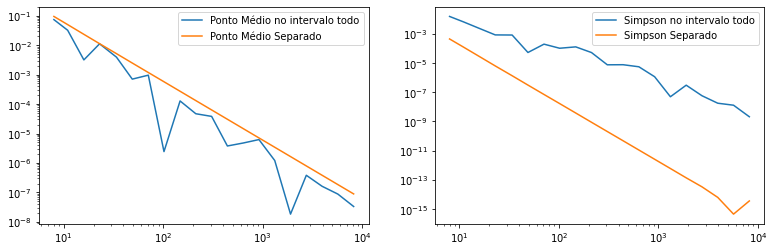

In [103]:
a, c, b = 0, np.pi, 6
exact = F(b) - F(a)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
ns = np.logspace(3,13, num=20, dtype=int, base=2)
err_simpsons = [abs(exact - simpson(f, a, b, n)) for n in ns]
err_medios = [abs(exact - midpoint(f, a, b, n)) for n in ns]

err_simpsons_sep = [abs(exact - (simpson(f, a, c, int(np.ceil(n/2))) + simpson(f, c, b, int(np.floor(n/2))) )) for n in ns]
err_medios_sep = [abs(exact - (midpoint(f, a, c, int(np.ceil(n/2))) + midpoint(f, c, b, int(np.floor(n/2))))) for n in ns]

# err_simpsons = [abs(exact - simpson(f, a, b,  2*n)) for n in ns]
# err_medios = [abs(exact - midpoint(f, a, b, 2*n)) for n in ns]

# err_simpsons_sep = [abs(exact - (simpson(f, a, c,n) + simpson(f, c, b, n ))) for n in ns]
# err_medios_sep = [abs(exact - (midpoint(f, a, c, n) + midpoint(f, c, b, n))) for n in ns]

ax1.loglog(ns, err_medios, label="Ponto Médio no intervalo todo")
ax1.loglog(ns, err_medios_sep, label="Ponto Médio Separado")
ax1.legend()

ax2.loglog(ns, err_simpsons, label="Simpson no intervalo todo")
ax2.loglog(ns, err_simpsons_sep, label="Simpson Separado")
ax2.legend()


ax = plt.gca()

In [97]:
assert len(ax1.lines) == 2
assert len(ax1.legend().texts) == 2
assert ax1.get_title != ""

In [98]:
assert len(ax2.lines) == 2
assert len(ax2.legend().texts) == 2
assert ax2.get_title != ""

In [99]:
ax = None

O que você observa?
O que você conclui?

Quando o intervalo não contém a descontinuidade no interior, obtemos novamente um gráfio linear de erros. No método de simpson, o erro com a integral feita separando o intervalo é menor que o erro do intervalo todo. Já no método do ponto médio, a separação do ponto médio gera um erro maior. Isso pode ser um efeito da diferença de sinal nos erros dos subintervalos. Assim, podemos perceber que quando o intervalo contém a descontinuidade em seu interior os erros ficam imprevisíveis e oscilam muito de acordo com o número de partições que fazemos.